In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def ecdf(data: list, bins=None):
    bins_ = 1
    if bins is None:
        bins = np.sort([min(data), max(data)] + data)
        bins_ = None
    his_vals, base = np.histogram(data, bins=bins)
    cumulative = np.cumsum(his_vals)
    if bins_ is None:
        return base, cumulative / max(cumulative)
    else:
        return base, (cumulative - 1) / (len(data) - 1)

In [2]:
figS9_data = scipy.io.loadmat("figS11.mat", simplify_cells=True)

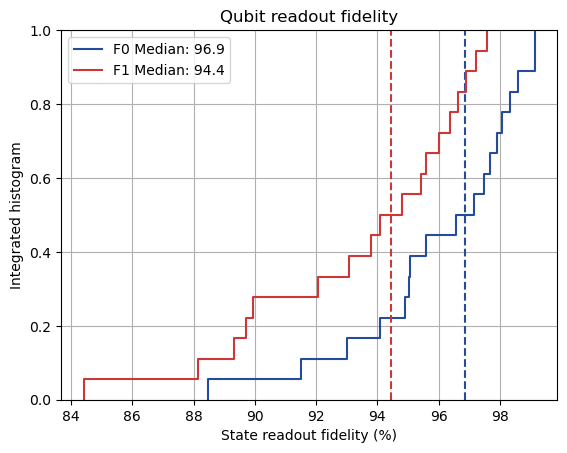

In [3]:
q_names = list([qname for qname in figS9_data.keys() if qname.startswith("q")])
F0_list = list([figS9_data[q_name][0] * 100 for q_name in q_names])
F1_list = list([figS9_data[q_name][1] * 100 for q_name in q_names])
base, steps = ecdf(F0_list)
plt.step(
    base[1:],
    steps,
    color="#244c9c",
    label="F0 Median: {:.1f}".format(np.median(F0_list)),
)
plt.plot([np.median(F0_list)] * 2, [0, 1], "--", color="#244c9c")
base, steps = ecdf(F1_list)
plt.step(
    base[1:],
    steps,
    color="#cc3737",
    label="F1 Median: {:.1f}".format(np.median(F1_list)),
)
plt.plot([np.median(F1_list)] * 2, [0, 1], "--", color="#cc3737")

plt.grid()
plt.ylim([0, 1.0])
plt.ylabel("Integrated histogram")
plt.xlabel("State readout fidelity (%)")
plt.title(r"Qubit readout fidelity")
plt.legend()